Question 1 Answer Modification 

T1

[[[  0   1]]

 [[  0 598]]

 [[590 448]]

 [[598 195]]]
[[  0.   1.]
 [598. 195.]
 [590. 448.]
 [  0. 598.]]
[[  0.   0.]
 [600.   0.]
 [600. 600.]
 [  0. 600.]]


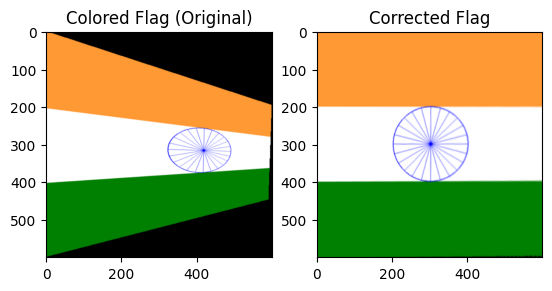

In [6]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
from math import cos, sin, radians  # Import cos, sin, and radians
from matplotlib import pyplot as plt

#usage
def solution(image_path):
    image1= cv2.imread(image_path)
    ######################################################################
    ######################################################################
    #####  WRITE YOUR CODE BELOW THIS LINE ###############################


    # Load and resize the image
    output_size = (600, 600)
    image = cv2.resize(image1, output_size)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area, assuming you want the largest one
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

    # Approximate the largest contour to find corners
    largest_contour = contours[0]
    epsilon = 0.05 * cv2.arcLength(largest_contour, True)
    corners = cv2.approxPolyDP(largest_contour, epsilon, True)

    print(corners)
    # Prepare source and destination points for perspective transformation
    src_points = np.array([point[0] for point in corners], dtype=np.float32)

    dst_points = np.array([(0, 0), (output_size[0] , 0), (output_size[0] , output_size[1] ), (0, output_size[1] )], dtype=np.float32)

    #print(src_points)
    #print(dst_points)
    # Calculate the center point of src_points
    src_center = np.mean(src_points, axis=0)

    # Calculate the center point of dst_points
    dst_center = np.mean(dst_points, axis=0)

    # Calculate the angles of src_points with respect to the center
    src_angles = np.arctan2(src_points[:, 1] - src_center[1], src_points[:, 0] - src_center[0])

    # Calculate the angles of dst_points with respect to the center
    dst_angles = np.arctan2(dst_points[:, 1] - dst_center[1], dst_points[:, 0] - dst_center[0])

    # Sort src_points and dst_points based on angles
    src_points_sorted = src_points[np.argsort(src_angles)]
    dst_points_sorted = dst_points[np.argsort(dst_angles)]
    print(src_points_sorted)
    print(dst_points_sorted)

    # Calculate the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(src_points_sorted, dst_points_sorted)

    # Apply the perspective transformation
    corrected_image = cv2.warpPerspective(image, matrix, output_size, borderMode=cv2.BORDER_REFLECT)

    # Display the original and corrected images
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Colored Flag (Original)")
    plt.subplot(122), plt.imshow(cv2.cvtColor(corrected_image , cv2.COLOR_BGR2RGB)), plt.title("Corrected Flag")
    plt.show()

    return corrected_image


corrected_image = solution('C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment 1\\Assignment 1\\Q1\\test\\4.png')

By Hough Transform  

In [2]:
import cv2
import numpy as np

image = cv2.imread('C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment 1\\Assignment 1\\Q1\\test\\4.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, threshold1=50, threshold2=150,apertureSize=3)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=50)

print(lines)
for line in lines:
    x1, y1, x2, y2 = line[0] 
    
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)


cv2.imshow('Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[[  0   0 478 156]]

 [[  0 323 240 307]]

 [[  3 165 352 208]]

 [[119 316 475 292]]

 [[206 191 477 225]]

 [[473 358 479 161]]

 [[191 431 365 387]]

 [[ 71 462 245 418]]

 [[280 408 454 364]]]


Generating the referance image 


<PIL.Image.Image image mode=RGB size=600x600 at 0x1B65453C410>


Text(0.5, 1.0, 'left')

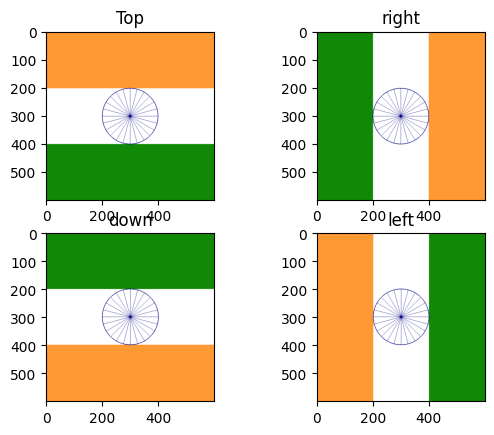

In [4]:
from PIL import Image, ImageDraw
from math import cos, sin, radians  # Import cos, sin, and radians
from matplotlib import pyplot as plt
# Create a blank white image
width, height = 600, 600
top_image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(top_image)
#print(top_image)
# Define the colors for the flag
saffron = (255, 153, 51)
white = (255, 255, 255)
green = (18, 136, 7)
navy_blue = (0, 0, 128)

# Draw the saffron rectangle at the top
saffron_height = height // 3
draw.rectangle([0, 0, width, saffron_height], fill=saffron)

# Draw the green rectangle at the bottom
green_height = height // 3
draw.rectangle([0, 2 * saffron_height, width, height], fill=green)
# Draw the green circle
circle_radius = 100
circle_center = (300, 300)
circle_width = 2
circle_color = "navy"

draw.ellipse(
    (circle_center[0] - circle_radius, circle_center[1] - circle_radius,
    circle_center[0] + circle_radius, circle_center[1] + circle_radius),
    outline=circle_color, width=circle_width
)

# Draw the Ashoka Chakra inside
chakra_radius = 0 # Approximate radius of the Ashoka Chakra
chakra_center = circle_center
chakra_color = "navy"  # Navy blue color

# Draw the 24 spokes
for i in range(24):
    angle = (360 / 24) * i
    x1 = 300
    y1 = 300
    x2 = chakra_center[0] + 100*cos(radians(angle))
    y2 = chakra_center[1] + 100*sin(radians(angle))
    draw.line((x1, y1, x2, y2), fill=chakra_color, width=1)



left_image = top_image.rotate(90, expand=True)

down_image = top_image.rotate(180, expand=True)

right_image = top_image.rotate(270, expand=True)

#print(right_image)

plt.subplot(221)
plt.imshow(top_image)
plt.title('Top')

plt.subplot(222)
plt.imshow(right_image)
plt.title('right')

plt.subplot(223)
plt.imshow(down_image)
plt.title('down')

plt.subplot(224)
plt.imshow(left_image)
plt.title('left')

Similarity Check 

In [14]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim

input_image = corrected_image  # Assuming corrected_image is loaded using cv2.imread
#print(input_image)
reference_image_paths = [top_image, right_image, down_image, left_image]
reference_images = []  # Initialize an empty list for reference images

# Load the reference images
for ref_image_path in reference_image_paths:
    ref_image = np.array(ref_image_path)
    #print(ref_image)       
    reference_images.append(ref_image)

similarity_scores = []

for ref_image in reference_images:
    # Perform feature matching and compute a similarity score (e.g., SSIM)
    # You can use SIFT, SURF, ORB, or other feature detectors and descriptors here.
    # For simplicity, let's use SSIM as a similarity metric.
    similarity = ssim(input_image, ref_image)
    similarity_scores.append(similarity)
    
best_match_index = np.argmax(similarity_scores)
best_match_image = reference_images[best_match_index]
cv2.imshow('Best Match Image', best_match_image)
print(f"Similarity Score: {similarity_scores[best_match_index]}")
cv2.waitKey(0)
cv2.destroyAllWindows()



[[[255 153  51]
  [255 153  51]
  [255 153  51]
  ...
  [255 153  51]
  [255 153  51]
  [255 153  51]]

 [[255 153  51]
  [255 153  51]
  [255 153  51]
  ...
  [255 153  51]
  [255 153  51]
  [255 153  51]]

 [[255 153  51]
  [255 153  51]
  [255 153  51]
  ...
  [255 153  51]
  [255 153  51]
  [255 153  51]]

 ...

 [[ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]
  ...
  [ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]]

 [[ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]
  ...
  [ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]]

 [[ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]
  ...
  [ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]]]
[[[ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]
  ...
  [255 153  51]
  [255 153  51]
  [255 153  51]]

 [[ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]
  ...
  [255 153  51]
  [255 153  51]
  [255 153  51]]

 [[ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]
  ...
  [255 153  51]
  [255 153  51]
  [255 153  51]]

 ...

 [[ 18 136   7]
  [ 18 136   7]
  [ 18 136   7]
  ..

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

Compilling all the 3 above

In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
from math import cos, sin, radians  # Import cos, sin, and radians
from matplotlib import pyplot as plt

#usage
def solution(image_path):
    image1= cv2.imread(image_path)
    ######################################################################
    ######################################################################
    #####  WRITE YOUR CODE BELOW THIS LINE ###############################


    # Load and resize the image
    output_size = (600, 600)
    image = cv2.resize(image1, output_size)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area, assuming you want the largest one
    contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)

    # Approximate the largest contour to find corners
    largest_contour = contours[0]
    epsilon = 0.05 * cv2.arcLength(largest_contour, True)
    corners = cv2.approxPolyDP(largest_contour, epsilon, True)

    print(corners)
    # Prepare source and destination points for perspective transformation
    src_points = np.array([point[0] for point in corners], dtype=np.float32)

    dst_points = np.array([(0, 0), (output_size[0] , 0), (output_size[0] , output_size[1] ), (0, output_size[1] )], dtype=np.float32)

    #print(src_points)
    #print(dst_points)
    # Calculate the center point of src_points
    src_center = np.mean(src_points, axis=0)

    # Calculate the center point of dst_points
    dst_center = np.mean(dst_points, axis=0)

    # Calculate the angles of src_points with respect to the center
    src_angles = np.arctan2(src_points[:, 1] - src_center[1], src_points[:, 0] - src_center[0])

    # Calculate the angles of dst_points with respect to the center
    dst_angles = np.arctan2(dst_points[:, 1] - dst_center[1], dst_points[:, 0] - dst_center[0])

    # Sort src_points and dst_points based on angles
    src_points_sorted = src_points[np.argsort(src_angles)]
    dst_points_sorted = dst_points[np.argsort(dst_angles)]
    print(src_points_sorted)
    print(dst_points_sorted)

    # Calculate the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(src_points_sorted, dst_points_sorted)

    # Apply the perspective transformation
    corrected_image = cv2.warpPerspective(image, matrix, output_size, borderMode=cv2.BORDER_REFLECT)

    # Display the original and corrected images
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Colored Flag (Original)")
    plt.subplot(122), plt.imshow(cv2.cvtColor(corrected_image , cv2.COLOR_BGR2RGB)), plt.title("Corrected Flag")
    plt.show()

    #-----------------------------------------------------
    #referance images stored

    # Create a blank white image
    width, height = 600, 600
    top_image = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(top_image)

    # Define the colors for the flag
    saffron = (255, 153, 51)
    white = (255, 255, 255)
    green = (18, 136, 7)
    navy_blue = (0, 0, 128)

    # Draw the saffron rectangle at the top
    saffron_height = height // 3
    draw.rectangle([0, 0, width, saffron_height], fill=saffron)

    # Draw the green rectangle at the bottom
    green_height = height // 3
    draw.rectangle([0, 2 * saffron_height, width, height], fill=green)
    # Draw the green circle
    circle_radius = 100
    circle_center = (300, 300)
    circle_width = 2
    circle_color = "navy"

    draw.ellipse(
        (circle_center[0] - circle_radius, circle_center[1] - circle_radius,
        circle_center[0] + circle_radius, circle_center[1] + circle_radius),
        outline=circle_color, width=circle_width
    )

    # Draw the Ashoka Chakra inside
    chakra_radius = 0 # Approximate radius of the Ashoka Chakra
    chakra_center = circle_center
    chakra_color = "navy"  # Navy blue color

    # Draw the 24 spokes
    for i in range(24):
        angle = (360 / 24) * i
        x1 = 300
        y1 = 300
        x2 = chakra_center[0] + 100*cos(radians(angle))
        y2 = chakra_center[1] + 100*sin(radians(angle))
        draw.line((x1, y1, x2, y2), fill=chakra_color, width=1)



    left_image = top_image.rotate(90, expand=True)

    down_image = top_image.rotate(180, expand=True)

    right_image = top_image.rotate(270, expand=True)
    #--------------------------------
    #Similarity check

    return image

print(solution('C:\\Users\\DELL\\Documents\\SEM 7\\EE604A(image Proccess)\\Assignment 1\\Assignment 1\\Q1\\test\\4.png'))
